In [1]:

import torch
import os
import random
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, TensorDataset

import librosa
import librosa.display
#import numba.decorators
import numpy as np
import matplotlib.pyplot as plt
#from numba.decorators import jit as optional_jit


#from google.colab import auth
#auth.authenticate_user()

#from google.colab import drive
#drive.mount('/content/gdrive')


PATH = 'C://Projects//keras_talk//keras//intern//dataset//'
#PATH = '/content/gdrive/My Drive/dataset/'


BATCH_SIZE = 40




C:\Users\DongHwi\anaconda3\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\DongHwi\anaconda3\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


#
###### y_data 
class를

0 ~ 180 까지는 20으로 나눠주어서 [0~9]로

-1(음성이 없는경우)는 10으로 구성하였습니다.

In [11]:
def Y_DATA(y_data):
    for idx in range(y_data.shape[0]):
        y = y_data[idx]
        if y < 0:  y_data[idx] = 10
        else:      y_data[idx] = (y//20)
    return y_data

 
 #
 
 mat2npy.py 에서

scipy.io.loadmat 함수를 이용해 .npy 로 저장했습니다.

.mat ==> .npy 

In [2]:

dataset_dict = { 0 : 'S_left',        1 : 'S_left_phase',
                 2 : 'S_right',       3 : 'S_right_phase',
                 4 : 'clean_left',    5 : 'clean_left_phase',
                 6 : 'clean_right',   7 : 'clean_right_phase',
                 8 : 'idx_drone_end', 9 : 'idx_voice_end',
                10 : 'idx_voice_start'}



In [3]:
""" mat2npy.np"""

# 
# import numpy as np
# from scipy.io import loadmat

# PATH = 'C://Users//DongHwi//Desktop//intern//'
# file = 'dataset_1.mat'


#dataset_dict = { 0 : 'S_left',        1 : 'S_left_phase',
#                 2 : 'S_right',       3 : 'S_right_phase',
#                 4 : 'clean_left',    5 : 'clean_left_phase',
#                 6 : 'clean_right',   7 : 'clean_right_phase',
#                 8 : 'idx_drone_end', 9 : 'idx_voice_end',
#                10 : 'idx_voice_start'}


# '''x_data'''
# for n in range(len(dataset_dict)):
#     mat_data_name = dataset_dict[n]
#     npy_from_mat  = mat_file[ mat_data_name ]

#     np.save( PATH + mat_data_name + '.npy', npy_from_mat )
#     print('saved as '+mat_data_name+'.npy')


# '''y_data'''
# y_data = loadmat( PATH+'angle.mat' )
# np.save( PATH+'angle.npy', y_data['phi'][:1000] )
# print('done.')
# 

' mat2npy.np'

#
###### data normalization


numpy_dict[0] ==> S_left.npy

numpy_dict[1] ==> S_left_phase.npy

numpy_dict[2] ==> S_right.npy

numpy_dict[3] ==> S_right_phase.npy


In [4]:
y_data =  np.load(PATH + 'angle.npy') 

x_data_list = [0,2,1,3]
numpy_dict = dict()

for n in x_data_list:
    numpy_name    = dataset_dict[n]
    numpy_dict[n] = np.load( PATH + numpy_name + '.npy' )


# .shape = (257, 382, 1000)
S_L_mag = numpy_dict[0]
S_L_phase = numpy_dict[1]
S_R_mag = numpy_dict[2]
S_R_phase = numpy_dict[3]



In [5]:
print(S_L_mag.shape)

(257, 382, 1000)


#

###### spectrogram

20*log( |x| + epsilon )  [dB]

[20]


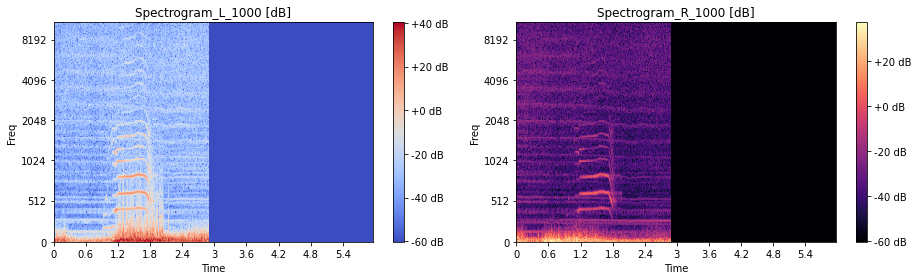

In [6]:

i = 1000

Freq = 16000


x_data_L = 20*np.log10( np.abs(S_L_mag[:,:,i-1]) + np.finfo(np.float16).eps )
x_data_R = 20*np.log10( np.abs(S_R_mag[:,:,i-1]) + np.finfo(np.float16).eps )
print(y_data[i-1])


plt.figure(figsize=(13,4))

plt.subplot(121)
librosa.display.specshow(x_data_L, sr=Freq, hop_length=250, x_axis='time', y_axis='mel')
plt.xlabel('Time')
plt.ylabel('Freq')
plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram_L_'+str(i)+ ' [dB]')

plt.subplot(122)
librosa.display.specshow(x_data_R, sr=Freq, hop_length=250, x_axis='time', y_axis='mel')
plt.xlabel('Time')
plt.ylabel('Freq')
plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram_R_'+str(i)+ ' [dB]')
plt.tight_layout()
plt.show()

#
###### spectrogram

librosa.amplitude_to_db

[20]


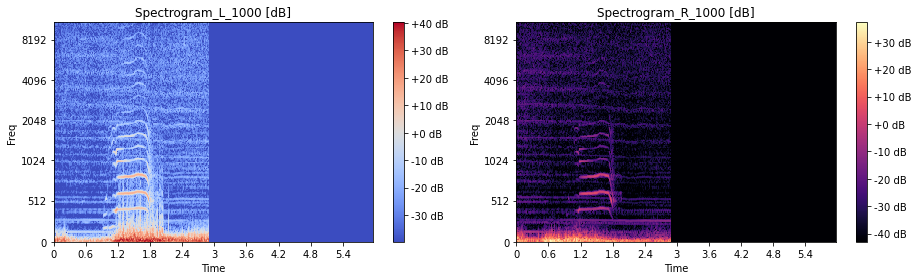

In [7]:

i = 1000
Freq = 16000


x_data_L_2 = librosa.amplitude_to_db(S_L_mag[:,:,i-1])
x_data_R_2 = librosa.amplitude_to_db(S_R_mag[:,:,i-1])
print(y_data[i-1])


plt.figure(figsize=(13,4))

plt.subplot(121)
librosa.display.specshow(x_data_L_2, sr=Freq, hop_length=250, x_axis='time', y_axis='mel')
plt.xlabel('Time')
plt.ylabel('Freq')
plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram_L_'+str(i)+ ' [dB]')

plt.subplot(122)
librosa.display.specshow(x_data_R_2, sr=Freq, hop_length=250, x_axis='time', y_axis='mel')
plt.xlabel('Time')
plt.ylabel('Freq')
plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram_R_'+str(i)+ ' [dB]')
plt.tight_layout()
plt.show()

# 

x_data 전처리

    -magnitude log 변환

    -정규화

In [8]:


x_data = []
'''    x_data,       y_data '''
'''(1000,4,257,382), (1000,)'''


for idx in range(1000):
    #
    x_element = []


    """ Mag """
    x_L = S_L_mag[:,:,idx]
    x_R = S_R_mag[:,:,idx]

    """log scale [dB]"""
    x_L = 20*np.log10( np.abs(x_L) + np.finfo(np.float16).eps )
    x_R = 20*np.log10( np.abs(x_R) + np.finfo(np.float16).eps )
    #x_L = librosa.amplitude_to_db(x_L)
    #x_R = librosa.amplitude_to_db(x_R)
    


    """phase"""
    x_L_phase = S_L_phase[:,:,idx]
    x_R_phase = S_R_phase[:,:,idx]



 #   """even mode, odd mode""" 
 #   x_even = (x_L + x_R)/2
 #   x_odd  = (x_L - x_R)/2
 #   x_element.append(x_even)
 #   x_element.append(x_odd)
    
    
    #x_element.shape ==> (4, 258, 382)
    x_element.append(x_L)
    x_element.append(x_R)
    x_element.append(x_L_phase)
    x_element.append(x_R_phase)



    """normalization"""
    for k in range(len(x_element)):
        x_mean = x_element[k].mean()
        x_stdv = x_element[k].std()
        x_element[k] = ( (x_element[k] - x_mean ) / x_stdv)
    


    x_data.append( np.asarray(x_element) )


x_data = np.asarray(x_data)
y_data = Y_DATA( y_data )

print('done...')


done...


#

training set   : 800

validation set : 200

In [10]:

train_size = 800
valid_size = 200


x_data = torch.from_numpy( x_data ).float().to('cpu')
y_data = torch.from_numpy( y_data ).long().to('cpu')

full_dataset = TensorDataset( x_data, y_data )

# 8:2 비율로 랜덤
train_dataset, valid_dataset = torch.utils.data.random_split( full_dataset, [train_size, valid_size])
train_dataset = DataLoader( dataset=train_dataset, batch_size = BATCH_SIZE, shuffle=True, drop_last=True)
valid_dataset = DataLoader( dataset=valid_dataset, batch_size = BATCH_SIZE, shuffle=True, drop_last=True)
